In [1]:
import tensorflow as tf
import numpy as np
import pickle

In [2]:
with open ('C:\\Users\\Wilfred\\Desktop\\Min-Max\\input_layer_4_6_17_4.pickle','rb') as file:
    input_data = pickle.load(file)
print(input_data.shape)
permutation = list(np.random.permutation(input_data.shape[0]))
input_data = input_data[permutation, :]
x_train = input_data[:100000,:]
x_valid = input_data[100000:102500, :]
x_test = input_data[102500:,:]



(105000, 24)


In [3]:
with open ('C:\\Users\\Wilfred\\Desktop\\Min-Max\\output_layer_4_6_17_4.pickle','rb') as file:
    output_data = pickle.load(file)
    
output_data = np.transpose(output_data)
output_data = output_data[permutation, :]
y_train = output_data[:100000,:]
y_valid = output_data[100000:102500, :]
y_test = output_data[102500:,:]
print(output_data.shape)

(105000, 12)


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(150,input_shape = [24], activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(12, activation = 'sigmoid')
])
adam = tf.keras.optimizers.Adam(lr = 0.0035)
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 1024, epochs = 100, verbose = 2,validation_data = (x_valid, y_valid))


Train on 100000 samples, validate on 2500 samples
Epoch 1/100
100000/100000 - 3s - loss: 0.2594 - accuracy: 0.8850 - val_loss: 0.1983 - val_accuracy: 0.9076
Epoch 2/100
100000/100000 - 2s - loss: 0.1859 - accuracy: 0.9120 - val_loss: 0.1807 - val_accuracy: 0.9125
Epoch 3/100
100000/100000 - 2s - loss: 0.1732 - accuracy: 0.9163 - val_loss: 0.1677 - val_accuracy: 0.9192
Epoch 4/100
100000/100000 - 2s - loss: 0.1643 - accuracy: 0.9204 - val_loss: 0.1661 - val_accuracy: 0.9202
Epoch 5/100
100000/100000 - 2s - loss: 0.1579 - accuracy: 0.9241 - val_loss: 0.1597 - val_accuracy: 0.9225
Epoch 6/100
100000/100000 - 1s - loss: 0.1520 - accuracy: 0.9275 - val_loss: 0.1547 - val_accuracy: 0.9262
Epoch 7/100
100000/100000 - 2s - loss: 0.1467 - accuracy: 0.9307 - val_loss: 0.1545 - val_accuracy: 0.9265
Epoch 8/100
100000/100000 - 2s - loss: 0.1413 - accuracy: 0.9337 - val_loss: 0.1454 - val_accuracy: 0.9307
Epoch 9/100
100000/100000 - 2s - loss: 0.1335 - accuracy: 0.9379 - val_loss: 0.1399 - val_accu

Epoch 77/100
100000/100000 - 2s - loss: 0.0148 - accuracy: 0.9945 - val_loss: 0.0324 - val_accuracy: 0.9891
Epoch 78/100
100000/100000 - 2s - loss: 0.0147 - accuracy: 0.9944 - val_loss: 0.0283 - val_accuracy: 0.9906
Epoch 79/100
100000/100000 - 2s - loss: 0.0116 - accuracy: 0.9957 - val_loss: 0.0411 - val_accuracy: 0.9875
Epoch 80/100
100000/100000 - 2s - loss: 0.0131 - accuracy: 0.9952 - val_loss: 0.0259 - val_accuracy: 0.9911
Epoch 81/100
100000/100000 - 2s - loss: 0.0121 - accuracy: 0.9954 - val_loss: 0.0329 - val_accuracy: 0.9891
Epoch 82/100
100000/100000 - 2s - loss: 0.0117 - accuracy: 0.9957 - val_loss: 0.0343 - val_accuracy: 0.9893
Epoch 83/100
100000/100000 - 2s - loss: 0.0122 - accuracy: 0.9954 - val_loss: 0.0313 - val_accuracy: 0.9904
Epoch 84/100
100000/100000 - 2s - loss: 0.0106 - accuracy: 0.9961 - val_loss: 0.0273 - val_accuracy: 0.9909
Epoch 85/100
100000/100000 - 2s - loss: 0.0109 - accuracy: 0.9959 - val_loss: 0.0317 - val_accuracy: 0.9901
Epoch 86/100
100000/100000 -

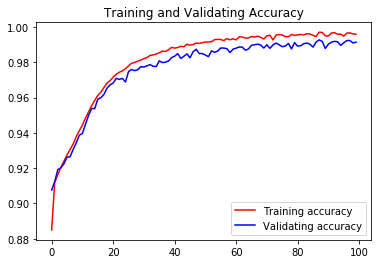

In [6]:
import matplotlib.pyplot as plt
plt.figure()
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validating accuracy')
plt.title('Training and Validating Accuracy')
plt.legend()
plt.show()

In [8]:
predict = model.predict(x_test)

In [9]:
print(predict.shape)

(2500, 12)


In [7]:
model.evaluate(x_test, y_test, verbose = 2)

2500/1 - 0s - loss: 0.0183 - accuracy: 0.9925


[0.023297416199743747, 0.9925332]

In [8]:
model.save('C:\\Users\\Wilfred\\Desktop\\weights\\Min_Max\\Min_Max_4_6_17_4_model.h5')